# Gaussian Normal Distribution Basics

A Gaussian Normal Distribution, often called a normal distribution, or a normal error function, is the least biased (maximum entropy) probability assumption to make if all you know about a set of data is its mean and standard deviation. It is also the distribution you get from combining many different random variables, even if the individual elements aren't normally distributed, as we will see in our dice simulations.

Always assume a Gaussian distribution for noise unless you know something different.

First import a bunch of components we will use...


In [27]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

The distribution looks like this for a mean of zero and a standard deviation of one. The probability of any one sample lying between $\pm$one standard deviation is 68%, $\pm$two standard deviations 95%, and $\pm$three standard deviations 99%. 

The probability density function is the probability per unit change in the independent variable, so the integral of the pdf from one value to another is the probability of a sample lying between the two values.

For any other mean and standard deviation, the shape stays the same but the numbers on the axes change.

scipy.stats.norm (http://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.norm.html) gives you a whole lot of functions, including pdf for the probability density function and cdf() for the cumulative distribution (the integral of the pdf). You can find pdf in other libraries as well.

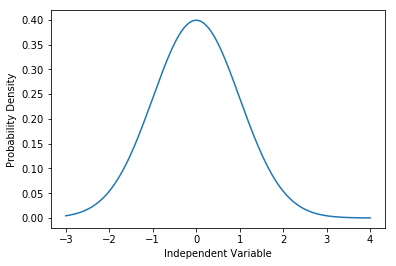

In [28]:
x = np.linspace(-3,4,1000)
f = norm.pdf(x,0,1)
plt.plot(x,f)
plt.ylabel('Probability Density')
plt.xlabel('Independent Variable')

 What's the probability that a sample will be less than 1?

In [38]:
norm.cdf(1)

0.84134474606854293

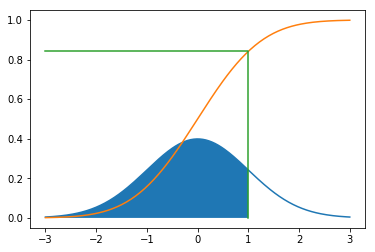

In [39]:
f = norm.pdf(x,0,1) 
g = norm.cdf(x,0,1)
plt.plot(x,f)
plt.plot(x,g)
xto1 = np.linspace(-3,1,1000)
fto1 = norm.pdf(xto1,0,1) 
plt.fill_between(xto1,0,fto1)
plt.plot([1,1,-3],[0,norm.cdf(1,0,1),norm.cdf(1,0,1)])

How large is the region containing 95% of the probability if a distribution has a mean of 192 and a standard deviation of 10?

(185.25510249803918, 198.74489750196082)


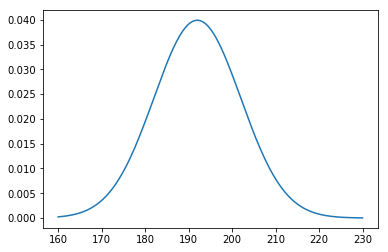

In [41]:
print(norm.interval(0.50,192,10))
xx = np.linspace(160,230,300)
plt.plot(xx,norm.pdf(xx,192,10))

So the interval containing 95% of the samples isn't exactly $\pm$two standard deviations:

If the temperature readings were normally distributed with a mean of 24.5 C and a standard deviation of 0.25 C, what would be the probability of getting a reading between 24.1 and 24.6 C? 

In [42]:
P246 = norm.cdf(24.6,24.5,0.25)    
P241 = norm.cdf(24.1,24.5,0.25)    
P246 - P241

0.60062244991076763

Looks like about 60% chance...

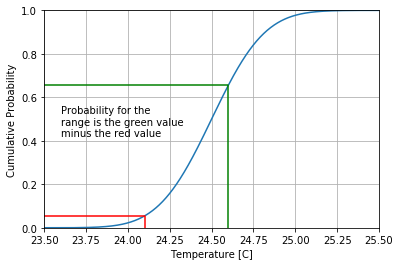

In [43]:
t = np.linspace(23,26,1000)
g = norm.cdf(t,24.5,0.25)
plt.plot(t,g)
plt.plot([24.6,24.6,23.5],[0,P246,P246],color = 'g')
plt.plot([24.1,24.1,23.5],[0,P241,P241],color = 'r')
plt.xlabel('Temperature [C]')
plt.ylabel('Cumulative Probability')
plt.text(23.6,0.42,'Probability for the \nrange is the green value \nminus the red value')
plt.axis([23.5, 25.5, 0,1])
plt.grid(True)

Table 4.3 in Figliola and Beasley (or similar in any other text book) is just a whole lot of values from one side of the cumulative PDF curve. The 0.5 is because there's a 50% chance of being below the mean, so, for example on one side there's a 39.44% chance of being between the mean and 1.25 stand deviations out. Ignore the tables unless you want a retro experience...

In [34]:
sample = 1.25
norm.cdf(sample,0,1) - 0.5

0.39435022633314465

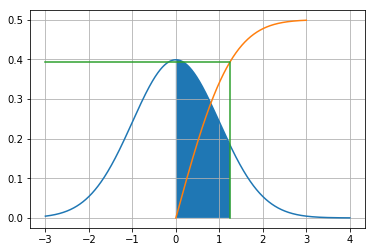

In [35]:
plt.plot(x,f)
plt.plot(np.linspace(0,3,1000),norm.cdf(np.linspace(0,3,1000))-0.5)
plt.fill_between(np.linspace(0,sample,100),0,norm.pdf(np.linspace(0,sample,100)))
v = norm.cdf(sample)-0.5
plt.plot([sample,sample,-3],[0,v,v])
plt.grid(True)

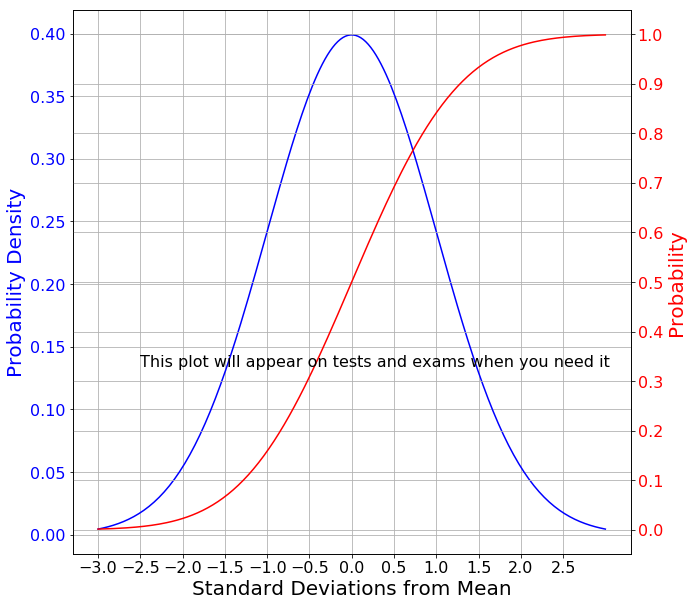

In [36]:
x = np.linspace(-3,3,200)
xh = np.linspace(0,3,200)
f = norm.pdf(x,0,1) 
g = norm.cdf(x,0,1)
h = norm.cdf(xh,0,1) - 0.5


fig, ax1 = plt.subplots(figsize=(10,10))
ax1.plot(x,f, 'b-')
ax1.xaxis.set_ticks(np.arange(-3,3,0.5))
ax1.set_xlabel('Standard Deviations from Mean',fontsize=20)
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Probability Density', color='b',fontsize=20)
for tl in ax1.get_yticklabels():
    tl.set_color('b')
    tl.set_size(16)
for tl in ax1.get_xticklabels():
    tl.set_size(16)
ax1.grid()    

ax2 = ax1.twinx()
s2 = np.sin(2*np.pi*t)
ax2.plot(x, g,'r-')
ax2.yaxis.set_ticks(np.arange(-0,1.01,0.1))
ax2.set_ylabel('Probability', color='r',fontsize=20)
for tl in ax2.get_yticklabels():
    tl.set_size(16)
    tl.set_color('r')

ax2.grid()

ax2.text(-2.5,.33,'This plot will appear on tests and exams when you need it',fontsize=16)

plt.show()